In [2]:
#IMPORT LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
##IMPORT DATA

In [4]:
#database obtained from kaggle
df = pd.read_csv('TravelInsurancePrediction.csv', header = 0)

In [5]:
#get dimensions
df.shape

(1987, 10)

In [6]:
#check for null values 
df.isnull().values.any()

False

In [7]:
#rename columns so dummies are + understandable
df = df.rename( columns = {"TravelInsurance" : "Insurance", "Employment Type" : "Employment", "Unnamed: 0" : "Index", "GraduateOrNot" : "Graduate", "AnnualIncome" : "Income", "FamilyMembers" : "Family", "FrequentFlyer" : "Frequent", "EverTravelledAbroad" : "Abroad" })



In [8]:
#see the first values of the data frame
df.head()

,Index,Age,Employment,Graduate,Income,Family,ChronicDiseases,Frequent,Abroad,Insurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [9]:
#get the dummies columns 
df= pd.get_dummies(df, columns= ["Graduate", "Frequent", "Abroad", "Employment"]) 

In [10]:
#rename the employment dummies
df = df.rename( columns = {"Employment_Government Sector": "Employment_Government", "Employment_Private Sector/Self Employed": "Employment_Private" })

In [11]:
#check all the data frame with the newly created dummies
df.head()

,Index,Age,Income,Family,ChronicDiseases,Insurance,Graduate_No,Graduate_Yes,Frequent_No,Frequent_Yes,Abroad_No,Abroad_Yes,Employment_Government,Employment_Private
0,0,31,400000,6,1,0,0,1,1,0,1,0,1,0
1,1,31,1250000,7,0,0,0,1,1,0,1,0,0,1
2,2,34,500000,4,1,1,0,1,1,0,1,0,0,1
3,3,28,700000,3,1,0,0,1,1,0,1,0,0,1
4,4,28,700000,8,1,0,0,1,0,1,1,0,0,1


In [12]:
y = df["Insurance"]

In [13]:
X = df.loc[ : , df.columns != "Insurance"]
X = X.drop(["Index"], axis=1)
X.head()

,Age,Income,Family,ChronicDiseases,Graduate_No,Graduate_Yes,Frequent_No,Frequent_Yes,Abroad_No,Abroad_Yes,Employment_Government,Employment_Private
0,31,400000,6,1,0,1,1,0,1,0,1,0
1,31,1250000,7,0,0,1,1,0,1,0,0,1
2,34,500000,4,1,0,1,1,0,1,0,0,1
3,28,700000,3,1,0,1,1,0,1,0,0,1
4,28,700000,8,1,0,1,0,1,1,0,0,1


In [14]:
#TREE MODEL 
#CLASSIFICATION TREE

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [16]:
fitcriterion = 'gini'

In [17]:
tree1 = DecisionTreeClassifier(criterion = fitcriterion,\
                             max_depth = None,\
                             max_leaf_nodes = 10).fit(X, y )

In [18]:
tree1.tree_.node_count  # number of terminal nodes

19

In [19]:
tree1.tree_.max_depth #Max depth

5

In [20]:
tree1.score(X, y) #R squared

0.8359335681932561

[Text(0.5535714285714286, 0.9166666666666666, 'X[1] <= 1325000.0\ngini = 0.459\nsamples = 1987\nvalue = [1277, 710]'),
 Text(0.32142857142857145, 0.75, 'X[0] <= 32.5\ngini = 0.364\nsamples = 1638\nvalue = [1246, 392]'),
 Text(0.14285714285714285, 0.5833333333333334, 'X[1] <= 425000.0\ngini = 0.303\nsamples = 1252\nvalue = [1019, 233]'),
 Text(0.07142857142857142, 0.4166666666666667, 'gini = 0.113\nsamples = 183\nvalue = [172, 11]'),
 Text(0.21428571428571427, 0.4166666666666667, 'gini = 0.329\nsamples = 1069\nvalue = [847, 222]'),
 Text(0.5, 0.5833333333333334, 'X[2] <= 5.5\ngini = 0.484\nsamples = 386\nvalue = [227, 159]'),
 Text(0.35714285714285715, 0.4166666666666667, 'X[2] <= 2.5\ngini = 0.333\nsamples = 270\nvalue = [213, 57]'),
 Text(0.2857142857142857, 0.25, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.42857142857142855, 0.25, 'X[1] <= 525000.0\ngini = 0.354\nsamples = 248\nvalue = [191, 57]'),
 Text(0.35714285714285715, 0.08333333333333333, 'gini = 0.17\nsamples = 32\n

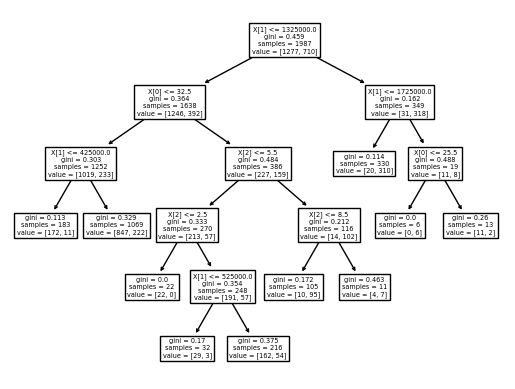

In [21]:
plot_tree(tree1)

In [22]:
#PRUNE THE TREE

In [23]:
#Cost Complexity Pruning

In [24]:
tree_pruned = DecisionTreeClassifier(ccp_alpha = 5.0, criterion = 'gini').fit(X, y)

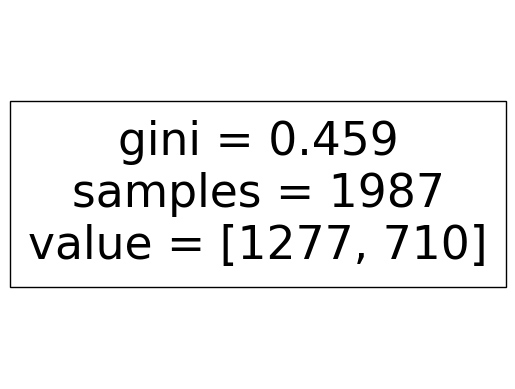

In [25]:
plot_tree(tree_pruned)
plt.show()

In [26]:
path = tree.cost_complexity_pruning_path(X, y)
alphas = path["ccp_alphas"]

NameError: name 'tree' is not defined

In [27]:
alphas

NameError: name 'alphas' is not defined

In [28]:
from sklearn.metrics import accuracy_score
import seaborn as sns
accuracy=[]

for i in alphas:
    tree=DecisionTreeClassifier(ccp_alpha=i)
    tree.fit(X,y)
    y_pred=tree.predict(X)
    accuracy.append(accuracy_score(y_pred, y))

    
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy,x=alphas,label="Accuracy")
plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()

NameError: name 'alphas' is not defined

In [29]:
treepruned2= DecisionTreeClassifier(ccp_alpha = 0.02, criterion = 'gini').fit(X, y)

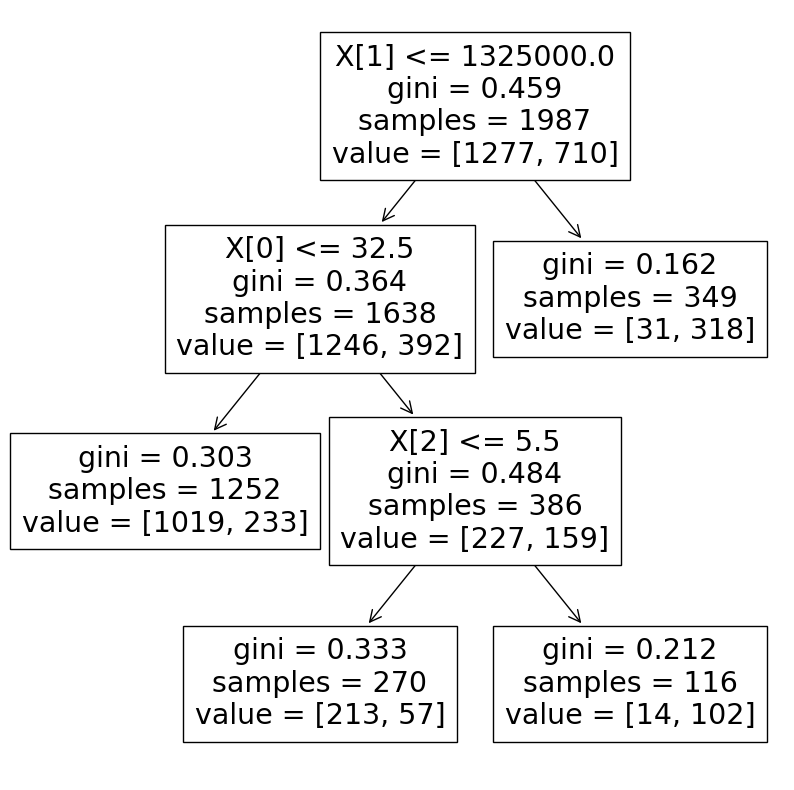

In [30]:
plt.figure(figsize = (10,10))
plot_tree(treepruned2)
plt.show()

In [31]:
#X[1] = Income    (FIRST NODE)
#X[0] = Age     (SECOND NODE)
#X[2] = Family   (THIRD NODE)


In [32]:
#CROSS VALIDATION

In [33]:
x = X

In [34]:
X = X.to_numpy()
Y = y.to_numpy()
Y = np.ravel(Y)
X

array([[     31,  400000,       6, ...,       0,       1,       0],
       [     31, 1250000,       7, ...,       0,       0,       1],
       [     34,  500000,       4, ...,       0,       0,       1],
       ...,
       [     28, 1150000,       6, ...,       0,       0,       1],
       [     34, 1000000,       6, ...,       1,       0,       1],
       [     34,  500000,       4, ...,       0,       0,       1]])

In [35]:
Y

array([0, 0, 1, ..., 0, 1, 0])

In [36]:
from sklearn.model_selection import KFold
from statistics import mean


cv_errors = []
classError_k = []
    #10 fold CV
cv = KFold(n_splits = 10, random_state = 1, shuffle = True).split(df)
for train_index, test_index in cv:
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    model = DecisionTreeClassifier(ccp_alpha = 0.02, criterion = 'gini').fit(X_test, Y_test)
    classError_k.append(sum(Y_test != model.predict(X_test))/len(Y_test))      

mean(classError_k)


0.18115577889447237

In [37]:
#MAKING TREE MORE APPEALING

In [38]:
#save column names in a list
feature_columns = []
for col in x.columns:
    feature_columns.append(col)
feature_columns 

['Age',
 'Income',
 'Family',
 'ChronicDiseases',
 'Graduate_No',
 'Graduate_Yes',
 'Frequent_No',
 'Frequent_Yes',
 'Abroad_No',
 'Abroad_Yes',
 'Employment_Government',
 'Employment_Private']

In [39]:
#importing libraries for visulization 
import graphviz
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

In [40]:
#dot data
dot_data = tree.export_graphviz(treepruned2, out_file=None, 
                      feature_names= feature_columns,  
                      class_names= ['0','1'],filled=True, rounded=True,  
                      special_characters=True)  

In [41]:
graph = pydotplus.graph_from_dot_data(dot_data)  

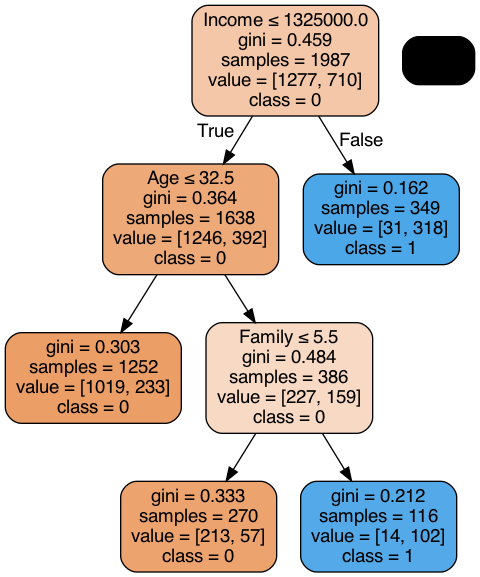

In [42]:
from IPython.display import Image
Image(graph.create_png())

/Users/frida/env_hw3_310/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


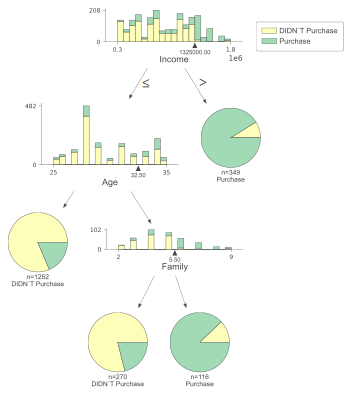

In [43]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(treepruned2, X, y,
                feature_names= feature_columns,  
                class_names= ['DIDN´T Purchase','Purchase'])

viz